<h1><center>РОССИЙСКАЯ АКАДЕМИЯ НАРОДНОГО ХОЗЯЙСТВА ГОСУДАРСТВЕННОЙ СЛУЖБЫ ПРИ ПРЕЗИДЕНТЕ РОССИЙСКОЙ ФЕДЕРАЦИИ</center></h1>

***

<h3><center>РЕФЕРАТ</center></h3>

<h3><center>'Применение SVD в Машинноим обучении (ML)'</center></h3>

<h3><center>по дисциплине «Линейная алгебра»</center></h3>

<br/><br/>

<div style="text-align: right"><h4>Выполнил студент ФПиЭ 2 курса</h4>
<h4>Иванов Даниил</h4></div>


<br/><br/>

<div style="text-align: right"><h4>Дата  20.12.2022</h4></div>


<br/><br/>

<div style="text-align: right"> <h4>Проверил преподаватель кафедры прикладных</h4>
<h4>информационных технологий</h4>
<h4>Фарков Ю.А.</h4> 
<h4>Оценка(баллы) ___________</h4></div>

<hr style="border:2px solid gray">

<h2><center>Содержание</center></h2>

<h3>1. Введение </h3>
<h3>2. Теоретические сведения </h3>
<h3>3. Примеры </h3>
<h3>Список литературы </h3>

<br/><br/>

<hr style="border:2px solid gray">

<h3> 1. Введение </h3>

<p>Линейная алгебра плотно легла в основу компьютерных наук и, в частности, в сферу машинного обучения. Так, любые операционные объекты принято представлять и хранить в виде матриц (либо векторов, в случае одномерности данных) из-за:
   <ol>
 <li> высокой скорости обработки данных и выполнения базовых операций;</li>
 <li> удобства представления громоздких формул в лаконичном виде;</li>
</ol> 
Именно поэтому на любых курсах и программах по ML курс "линейной алгебры" закладывается в фундамент математических дисциплин, на основе которых идёт объяснение 'подкапотья' моделей и принципов их работы.

В этом реферате я сосредоточусь на крайне популярном методе разложения матриц  - <strong>сингулярном разложении матриц</strong> (<strong><dfn><abbr title="Singular Value Decomposition ">SVD</abbr></dfn></strong>), 
который имеет высокую практическую применимость в сфере компьютерных наук и машинного обучения. Сначала будут даны теоритические основы о данном методе, многие доказательства будут опущены*. В конце будут рассмотрены примеры применения SVD. </p>

<hr style="border:0.3px solid gray">

*Полагается дать интуитивное понимание SVD без всей строгости математических выкладок.

<h3> 2. Теоретические сведения </h3>

<h4 size="4" color="MediumBlue">1. Ортогональная матрица</h4>

<font size="3" color="MediumBlue">Определение</font>

Матрица $A \in$ $\mathbb{R}^{n \times n}$ называется <font color="DodgerBlue">ортогональной</font>, если $A^{-1}$ = $A^{T}$.

<font size="3" color="MediumBlue">Примеры</font>



\begin{equation*}
A_{1} = \left( \begin{array}{ccc}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\end{array} \right),\quad
A_{2} = \left( \begin{array}{ccc}
\frac{\sqrt3}{2} & \frac{1}{2}\\
\frac{-1}{2} & \frac{\sqrt3}{2}\end{array} \right),\quad
A_{3} = \left( \begin{array}{ccc}
\pm1 & 0 & 0 & 0\\
0 & 0 & 0 & \pm1\\
0 & 0 & \pm1 & 0\\
0 & \pm1 & 0 & 0\end{array} \right)
\end{equation*}

<font size="3" color="MediumBlue">Свойства</font>

<ul>
  <li>$A^{T} A$ = $A A^{T}$ = $I$</li>
  <li><font size="2" color="MediumBlue">Столбцы(строки)</font> - вектора длины 1, ортогональные друг другу</li>
  <li><font size="2" color="MediumBlue">Собственные числа:</font> $\lambda \in \mathbb{C}, |\lambda| =1$</li>
  <li><font size="2" color="MediumBlue">Собственные вектора:</font> ортогональны друг другу</li>
  <li><font size="2" color="MediumBlue">Определитель:</font> $detA = \pm1$</li>
</ul>

<font size="3" color="MediumBlue">Геометрический смысл</font>

<p><font size="2" color="MediumBlue">Ортогональная матрица </font> задаёт линейсное преобразование, которое сохраняет <font size="2" color="MediumBlue">длины </font> векторов и <font size="2" color="MediumBlue">углы </font> между ними.

То есть такая матрица инициализирует поворот, если $detA =1$, либо отражение, если $detA = -1$</p>

<table>
  <tr>
    <td>
      <img src = 'fig1.png' width="200" height="200" />
    </td>
  </tr>

  <tr>
    <td><center><b>Изначальное расположение векторов</b></center></td>
  </tr>
</table>

<table>
  <tr>
    <td>
      <img src="fig2.png" alt="Amet consectetur" width="200" height="200" title="2">
    </td>
    <td>
      <img src="fig3.png"  alt="Amet consectetur" width="200" height="200" title="1">
    </td>
  </tr>

  <tr>
    <td><center><b>Поворот</b></center></td>
    <td><center><b>Отражение</b></center></td>
  </tr>
</table>

<h4 size="4" color="MediumBlue">2. Симметричная матрица</h4>

<font size="3" color="MediumBlue">Определение</font>

Матрица $A \in$ $\mathbb{R}^{n\times n}$ называется <font color="DodgerBlue">симметричной</font>, если $A$ = $A^{T}$.

<font size="3" color="MediumBlue">Примеры</font>



\begin{equation*}
A_{1} = \left( \begin{array}{ccc}
1 & 2 & 3\\
2 & 4 & 5\\
3 & 5 & 6\end{array} \right),\quad
A_{2} = \left( \begin{array}{ccc}
0 & 1 & 2 & 3\\
1 & 0 & 1 & 2\\
2 & 1 & 0 & 1\\
3 & 2 & 1 & 0\end{array} \right)
\end{equation*}

<font size="3" color="MediumBlue">Свойства</font>

<ul>
  <li><font size="2" color="MediumBlue">Собственные числа:</font> $\forall \lambda \in \mathbb{R}$</li>
  <li><font size="2" color="MediumBlue">Собственные вектора:</font> $\forall v \in \mathbb{R}$, ортогональны друг другу</li>
   <li><font size="2" color="MediumBlue">Спектральное разложение:</font> $A=PDP^{T}$</li>
</ul>

<font size="3" color="MediumBlue">Геометрический смысл</font>

<p>Симметритчная матрица  $A \in$ $\mathbb{R}^{n\times n}$ растягивает пространство по $n$  <font size="2" color="MediumBlue">перпендикулярным </font> направлениям.</p>

<h4 size="4" color="MediumBlue">3. Прямоугольно-диагональная матрица</h4>

<font size="3" color="MediumBlue">Определение</font>

Матрица $A \in$ $\mathbb{R}^{m\times n}$ называется <font color="DodgerBlue">прямоугольно-диагональной</font>, если 
$\begin{pmatrix} a_{i,j} \end{pmatrix} : \forall i,j \in \{1,2,\ldots,min(m,n)\}, i \neq j, \implies a_{i,j} =0$.


<font size="3" color="MediumBlue">Примеры</font>

<font size="2" color="MediumBlue">Высокие</font>

\begin{equation*}
A_{1} = \left( \begin{array}{ccc}
1 & 0 & 0\\
0 & 2 & 0\\
0 & 0 & 3\\
0 & 0 & 0\\
0 & 0 & 0\end{array} \right),\quad
A_{2} = \left( \begin{array}{ccc}
9 \\
0 \\
0\end{array} \right),\quad
A_{3} = \left( \begin{array}{ccc}
2 & 0\\
0 & 3\\
0 & 0\end{array} \right)
\end{equation*}

<font size="2" color="MediumBlue">Широкие</font>

\begin{equation*}
A_{1} = \left( \begin{array}{ccc}
1 & 0 & 0 & 0 & 0\\
0 & 2 & 0 & 0 & 0\\
0 & 0 & 3 & 0 & 0\end{array} \right),\quad
A_{2} = \left( \begin{array}{ccc}
9 & 0 & 0\end{array} \right),\quad
A_{3} = \left( \begin{array}{ccc}
2 & 0 & 0\\
0 & 3 & 0\end{array} \right)
\end{equation*}

<font size="3" color="MediumBlue">Геометрический смысл</font>

<p><b>Замечание:</b> Всякая прямоугольно-диагональная матрица явлвяется "как бы" симметричной, т.к. все недиагональные элементы нулевые, а значит она должна отожествлять такое же линейное геометрическое преобразование, как и симметричные, то есть масштабирование.<br>
Так оно и есть, только добавляется особенность, связанная с размерностью матрицы:
<ul>
  <li>Высокая диагональная матрица  $A \in$ $\mathbb{R}^{m\times n}$ повышает порядок пространства с $n$ до $m$, создавая $(m-n)$ нулевых осей.</li>
  <li>Широкая диагональная матрица  $A \in$ $\mathbb{R}^{m\times n}$ сжимает пространство с $m$ до $n$ порядка, отсекая $(n-m)$ осей.</li>
 
</ul></p>

<b>Широкая диагональная матрица</b>

Пусть $A = \left( \begin{array}{ccc}
2 & 0 & 0\\
0 & 0.5 & 0\end{array} \right)$, тогда при воздействии на $\left( \begin{array}{ccc}
x\\
y\\
z\end{array} \right)$ ось $z$ отсечётся, а по $x$ и $y$ произойдет растяжение на 2 и 0.5 соответственно. Получится, что при воздействии данной матрицы на сферу, она переведет её в элипс.

<table>
  <tr>
    <td>
      <img src="circle_1.png" alt="Amet consectetur" width="200" height="200" title="2">
    </td>
    <td>
      <img src="cirlce_2.png"  alt="Amet consectetur" width="300" height="300" title="1">
    </td>
  </tr>
</table>

<b>Высокая диагональная матрица</b>

Пусть $A = \left( \begin{array}{ccc}
2 & 0\\
0 & 0.5\\
0 & 0\end{array} \right)$, тогда при воздействии на $\left( \begin{array}{ccc}
x\\
y\\
z\end{array} \right)$ добавится 3 ось $z$, а по $x$ и $y$ произойдет растяжение на 2 и 0.5 соответственно. Получится, что при воздействии данной матрицы на круг, она переведет её в элипсоид, сплющенный по оси $z$.

<table>
  <tr>
    <td>
      <img src="circle_3.png" alt="Amet consectetur" width="200" height="200" title="2">
    </td>
    <td>
      <img src="circle_4.png"  alt="Amet consectetur" width="300" height="300" title="1">
    </td>
  </tr>
</table>

<h4 size="4" color="MediumBlue">4. Теорема</h4>

Для любой ненулевой вещественной матрицы $A \in \mathbb{R}^{m\times n}$ существуют две вещественные ортогональные матрицы $U$ и $V$, такие, что $U^{T}AV$ считается матрицей $Σ\in \mathbb{R}^{m\times n}$ с неотрицательными элементами на главной диагонали. В прямоугольной матрице под главной диагональю будем понимать совокупность элементов $Σ_{ii}$). Все элементы матрицы $Σ$, не лежащие на главной диагонали, считаются нулевыми.

$U$ и $V$ при этом можно выбрать таким образом, чтобы диагональные элементы матрицы $Σ$ имели вид:

$$\mu_{1}\geqslant \mu_{2}\geqslant ... \geqslant \mu_{r} > \mu_{r+1}=...=\mu_{n}=0,$$

где $r$ — ранг матрицы $A$. В частности, если $A$ невырождена, то: 

$$\mu_{1}\geqslant \mu_{2}\geqslant ... \geqslant \mu_{r} > 0.$$

Представление матрицы $A$ в виде $A=UΣV^{T}$, где

$U \in \mathbb{R}^{m\times m}$ - ортогональная матрица, 
$V \in \mathbb{R}^{n\times n}$ - ортогональная матрица,
$Σ \in \mathbb{R}^{m\times n}$ - прямоугольно-диагональная матрица,

называется _сингулярным разложением — Singular Values Decomposition, (SVD)_.

Элементы, лежащие на главной диагонали матрицы $Σ$, называются _сингулярными числами_ матрицы $A$. Столбцы матриц $U$ и $V$ называются _левыми и правыми сингулярными векторами_ матрицы $A$ соответственно.

__Геометрический смысл SVD__

Пусть матрица $A \in \mathbb{R}^{m\times n}$ описывает линейный оператор, обозначаемый $\textbf{A}$. Сингулярное разложение матрицы $A=UΣV^{T}$ тогда можно будет переформулировать в геометрическом контексте: линейный оператор, характеризующий сложное отображение элементов пространства $\mathbb{R}^{n}$ в элементы пространства $\mathbb{R}^{m}$, можно будет представить в виде последовательно выполняемых простых линейных операций вращения (ортогональный оператор $V^{T}$), растяжения (диагональный оператор $Σ$) и снова вращения (ортогональный оператор $U$).

Поэтому компоненты сингулярного разложения показывают геометрические изменения при отображении линейным оператором $\textbf{A}$ векторов из одного линейного пространства в другое.

Число ненулевых элементов на диагонали матрицы $Σ$ будет характеризовать фактическую размерность собственного пространства матрицы $A$ — набора векторов $b$, при котором уравнение $Ax=b$ будет иметь ненулевое решение.

<img src = "Singular-Value-Decomposition.png" style ='width:300px;height:300px'/>

На рисунке выше представлено сингулярное разложение действительной матрицы $M \in$ $\mathbb{R}^{3х2}$. 

Здесь наглядно видно, что преобразование единичного круга C (стрелки - канонические вектора) в элипс можно представить последовательным применением 3 действий:
1. Поворот C в исходном пространстве (представляется через $V^{T}$ / $V^{*}$)
2. Покоординатное масштабирование C + добавление/отсечение осей (представляется диагональным оператором $Σ$)
3. Поворот C в новом пространстве (представляется через $U$)

 <h3> 3. Примеры </h3>

__Пример 1: Преобразование векторных пространств__

Рассмотрим матрицу $A$, представляющую линейное преобразование $Ax=y$ из одного $n$-мерного пространства, $X$, в другое, $Y$. Предполагаем, что в $X$ и $Y$ заданы ортогональные системы координат. Рассмотрим ортогональное преобразование системы координат в пространстве $X$, в результате которого вектор $x$ получит новое представление $x'$, где $x=Vx'$. Таким же образом, применяя другое ортогональное преобразование координат в $Y$, мы получим новые координаты для $y$, где $y=Uy'$.

В результате изменения базисов $X$ и $Y$ преобразование, первоначально представленное матрицей $A$, будет представляться матрицей $Σ$:

$$y'=U^{T}y=U^{T}Ax=U^{T}A(Vx')=(U^{T}AV)x'=Σx'.$$

В новой ортогональной системе координат преобразование имеет очень простое представление:

$$\begin{cases}
y'_{1}=\mu_{1}x'_{1},\\ 
y'_{2}=\mu_{2}x'_{2},\\ 
... \\ 
y'_{r}=\mu_{r}x'_{r}, \\ 
y'_{r+1}=0, \\ 
... \\ 
y'_{n}=0.
\end{cases}$$

Оно теперь отображает координатные оси пространства $X$ с $1$-й до $r$-й в соответствующие координатные оси пространства $Y$, причём $\mu_{i}>0$ выступают коэффициентами растяжения. Последующие координатные оси от $(r+1)$ до $n$ отображаются в нулевой вектор пространства $Y$.

Таким образом, в этом случае применение SVD значительно упростило работу с линейным преобразованием из одного векторного пространства в другое.

__Пример 2: SVD и собственные значения матрицы__

Сингулярное разложение обладает свойством, связывающим задачу нахождения сингулярного разложения матрицы и задачу нахождения её собственных векторов.
Так как матрицы $U$ и $V$ ортогональные, из чего следует, что $U^{T}U=VV^{T}=E$, где $E$ — единичная матрица порядка $r$ , то:

$$AA^{T}=UΣV^{T}VΣU^{T}=UΣ^{2}U^{T},$$

$$A^{T}A=VΣU^{T}UΣV^{T}=VΣ^{2}V^{T}.$$

Умножив выражения справа на $U$ и $V$ соответственно, получим:

$$AA^{T}U=UΣ^{2},$$

$$A^{T}AV=VΣ^{2}.$$

Вспоминая определение собственных векторов и собственных значений, можно заключить, что левые сингулярные векторы матрицы $A$ (столбцы матрицы $U$) считаются собственными векторами матрицы $AA^{T}$, а квадраты сингулярных чисел, лежащих на главной диагонали матрицы $D$ — соответствующими собственными значениями этой матрицы.

Аналогично правые сингулярные векторы матрицы $A$ (столбцы матрицы $V$) считаются собственными векторами матрицы $A^{T}A$, а квадраты сингулярных чисел — её соответствующими собственными значениями.

Левый и правый сингулярные векторы $u$ и $v$, соответствующие одному и тому же сингулярному числу $\mu_{j}$, связаны соотношениями:

$$Av_{j}=\mu_{j}u_{j}, A^{T}u_{j}=\mu_{j}v_{j}.$$

## Пример 3: Сингулярное разложение в применении к приближению матрицей меньшего ранга

### Идея приближения матрицей меньшего ранга

На практике данные для обработки в большинстве случаев поступают с определённым уровнем шума, в связи с чем не вся информация, содержащаяся в матрице, представляет для анализатора ценность. Таким образом, имеет место задача о нахождении лучшей аппроксимации исходной матрицы $X$ размера $m\times n$ и ранга $r$ некоторой матрицей, ранг которой не превышает заданное число $k$.

Матрица может быть представлена как произведение двух матриц, обозначим его как $UV^{T}$, где $U$ имеет размер $m\times k$, $V$ — $n\times k$.

В случае задачи приближения всё сводится к тому, чтобы найти такие матрицы $U$ и $V$, где бы исходная матрица $X$ и матрица $UV^{T}$ отличались незначительно. Для оценки степени «близости» матриц обычно используется норма Фробениуса, и задача поиска оптимального разложения сводится к нахождению комбинации $U$ и $V$, дающей минимальную норму разности $\left \| X - UV^{T} \right \|$.

Другими словами, задача сводится к нахождению матриц $U$ и $V$, удовлетворяющих условию:

$$\sum_{ij}(x_{ij}-u_{i}v_{j}^{T})^{2}\rightarrow\text{min}.$$

Если исходная матрица $X$ была матрицей признаков объектов, то после такого преобразования матрица $U$ может быть интерпретирована как матрица новых признаков для тех же объектов, при этом происходит уменьшение размерности пространства признаков с минимальными потерями полезной информации.

### Использование SVD

Пусть для исходной матрицы $X$ требуется найти такую матрицу $\tilde{X}$ с рангом, не превышающим заданное число $k$, которая наилучшим образом приблизит исходную, то есть норма их разности $\left \| X - \tilde{X} \right \|$ будет минимальной.

Сингулярное разложение для исходной матрицы примет вид:

$$X=UΣV^{T}.$$

Искомую матрицу $\tilde{X}$ также запишем в виде разложения:

$$\tilde{X}=U\tilde{Σ}V^{T},$$

где $U$ и $V$ — те же, что и в сингулярном разложении матрицы $X$, а матрица $\tilde{Σ}$ произвольная, удовлетворяющая условию тождественности преобразования (не обязательно диагональная).

Тогда задача примет вид нахождения минимума нормы разности матриц $\left \| Σ - \tilde{Σ} \right \|$ рангом не выше $k$.

Поскольку все недиагональные элементы в матрице $Σ$ равны нулю, условие минимума разности приводит к тому, что недиагональные элементы в матрице $\tilde{Σ}$ также должны быть равными нулю. Если она диагональная, то, по условию не превышения ранга матрицы $\tilde{X}$ числа $k$, в ней должно быть максимум $k$ ненулевых элементов. Оптимальным в плане минимизации $\left \| Σ - \tilde{Σ} \right \|$ будет выбор $\tilde{Σ}$, равного матрице $Σ$, в которой все элементы, кроме $k$ наибольших по модулю, заменены нулями.

Таким образом, лучшим приближением матрицы $X$ будет матрица:

$$\tilde{X}=U\tilde{Σ}V^{T},$$

где матрица $\tilde{Σ}$ — это матрица $Σ$, в которой все элементы, кроме $k$ наибольших по модулю, заменены нулями.

### Применение на практике

In [61]:
# Импорт библиотек
import numpy as np
from numpy.linalg import norm
from numpy.linalg import svd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
from ipywidgets import interact

In [62]:
# Загружаем фотографию и делаем её редакттируемой
img = mpimg.imread(r'maestro.jpg')

img = np.array(img)

In [63]:
print(f'img type:{type(img)}')
print(f'img size:{img.shape}') # смотрим размер фотографии в пикселях: - 3 мерный кетор из-за цвета (RGB)

img type:<class 'numpy.ndarray'>
img size:(733, 1300, 3)


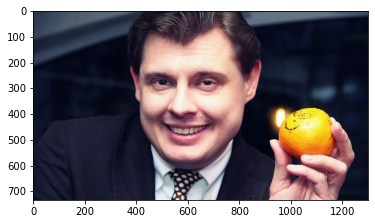

In [64]:
# Выведем фотографию

plt.imshow(img)
plt.show()

In [65]:
# Переведем ещё в серый цвет (для сжатия нет нужны хранить информацию о цветах(RGB), поэтому переведем в серый, тем самым
# сокращая размерность вектора до одиницы)

n_img = rgb2gray(img_as_float(img))
print(f'img type:{type(n_img)}')
print(f'img size:{n_img.shape}')

img type:<class 'numpy.ndarray'>
img size:(733, 1300)


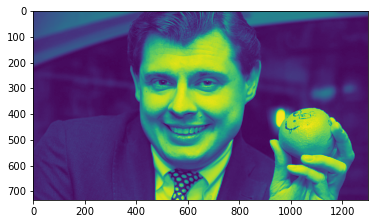

In [66]:
# Вывод фотографии в сером спектре

plt.imshow(n_img)
plt.show()

In [67]:
n_img.shape, n_img

((733, 1300),
 array([[0.18136745, 0.18136745, 0.18136745, ..., 0.24892   , 0.24892   ,
         0.24892   ],
        [0.19705373, 0.19313216, 0.18528902, ..., 0.26068471, 0.26068471,
         0.26068471],
        [0.18136745, 0.18136745, 0.18528902, ..., 0.26852784, 0.26852784,
         0.26852784],
        ...,
        [0.07346039, 0.08914667, 0.11267608, ..., 0.05523647, 0.0513149 ,
         0.04739333],
        [0.08355843, 0.07963686, 0.10316627, ..., 0.04347176, 0.04347176,
         0.0395502 ],
        [0.10513843, 0.08160902, 0.0897349 , ..., 0.04739333, 0.04739333,
         0.04739333]]))

In [68]:
# Функция для сжатия с параметром сжатия k (число ненулевых сингулярных значений)
# При помощи numpy.linalg.svd получаем синглуряное разложение матрицы фотографии
# На выходе получаем матрицу, ограничиваемую k ненулевыми диагональными элементами матрицы Σ 
# и список сингулярных чисел.

def compress_svd(image, k): # Параметр k задает степень сжатия
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    
    U, s, V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    
    return reconst_matrix,s

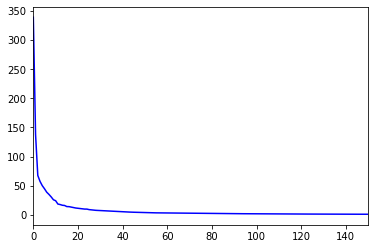

In [69]:
# Посмотрим значения первых 150 сингулярных чисел из 733

reconst_img,s = compress_svd(n_img,n_img.shape[0])
plt.xlim([0, 150])
plt.plot(s, color='blue')

In [75]:
# Функция, включающая предыдущую функцию сжатия, которая выводит сжатое фото

def show_compressed_img(k):  
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=n_img
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    
    fig = plt.figure(figsize=(16, 9))

    compression_ratio =100.0* k/original_shape[0]
    plt.title("Уровень сжатия={:.2f}".format(compression_ratio)+"%")
    plt.imshow(reconst_img, cmap='gray')
    plt.axis('off')

In [76]:
# двигая ползунок/изменяя параметр k(число ненулевых сингулярных чисел)
# функция отрендеривает изображение с заданной степенью сжатия.

interact(show_compressed_img,k=(1,img.shape[0]));

interactive(children=(IntSlider(value=367, description='k', max=733, min=1), Output()), _dom_classes=('widget-…

<h3><right>Список литературы </right></h3>

1. Bruce N. Cooperstein-Advanced Linear Algebra, 2015
2. Steven-Roman-Advanced-Linear-Algebra, 2008
3. Форсайт Дж., Малькольм М., Моулер К. Машинные методы математических вычислений., 1980.
4. Логинов Н. В. Сингулярное разложение матриц, 1996.
5. Частные материалы Эрика Муллагалиева  